# TD1

##  Tutorial : The Markov matrix and the exponential convergence 

All information available on [this link](http://lptms.u-psud.fr/membres/groux/Test/TD1_2016.html)

In [1]:
import numpy as np

# open boundary conditions
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

# uncomment to use periodic boundary conditions
#neighbor =  [[1, 3, 6, 2], [2, 4, 0, 7], [1, 5, 0, 8],
#             [4, 6, 5, 0], [5, 7, 3, 1], [3, 8, 4, 2],
#             [7, 0, 8, 3], [8, 1, 6, 4], [6, 2, 7, 5]]

transfer = np.zeros((9, 9))  # creates 9x9 matrix full of zeroes
for a in range(9):
    for b in neighbor[a]: 
        transfer[b, a] += 1/4
print(transfer)



[[ 0.5   0.25  0.    0.25  0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.    0.25  0.    0.    0.    0.  ]
 [ 0.    0.25  0.5   0.    0.    0.25  0.    0.    0.  ]
 [ 0.25  0.    0.    0.25  0.25  0.    0.25  0.    0.  ]
 [ 0.    0.25  0.    0.25  0.    0.25  0.    0.25  0.  ]
 [ 0.    0.    0.25  0.    0.25  0.25  0.    0.    0.25]
 [ 0.    0.    0.    0.25  0.    0.    0.5   0.25  0.  ]
 [ 0.    0.    0.    0.    0.25  0.    0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.    0.25  0.5 ]]


In [2]:
print("summing columns")
print([ sum(transfer[:,j]) for j in range(9)])
print("\nsumming rows")
print([ sum(transfer[j,:]) for j in range(9)])

summing columns
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

summing rows
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [3]:
bias = 0.5
def weight(x):
    if x in [0,2,6,8]: return (1.-bias/4.)/9.
    elif x is 4: return (1.+bias)/9.
    else: return (1.)/9.

np.set_printoptions(precision=3)
A = 1.0/4.0 # smaller than 0.25 to ensure positivity of all elements
        # 1/4 ensures that one recovers the connectivity matrix without bias         
transfer2 = np.zeros((9, 9))
for a in range(9):
    for b in neighbor[a]:
        if b is not a:
            transfer2[b, a] = A * min(1.0,weight(b)/weight(a))
for a in range(9):
    transfer2[a, a] = 1.0 - sum(transfer2[:,a])

print(transfer2)

print("summing columns")
print([ sum(transfer2[:,j]) for j in range(9)])
print("summing rows")
print([ sum(transfer2[j,:]) for j in range(9)])



[[ 0.5    0.219  0.     0.219  0.     0.     0.     0.     0.   ]
 [ 0.25   0.312  0.25   0.     0.167  0.     0.     0.     0.   ]
 [ 0.     0.219  0.5    0.     0.     0.219  0.     0.     0.   ]
 [ 0.25   0.     0.     0.312  0.167  0.     0.25   0.     0.   ]
 [ 0.     0.25   0.     0.25   0.333  0.25   0.     0.25   0.   ]
 [ 0.     0.     0.25   0.     0.167  0.312  0.     0.     0.25 ]
 [ 0.     0.     0.     0.219  0.     0.     0.5    0.219  0.   ]
 [ 0.     0.     0.     0.     0.167  0.     0.25   0.312  0.25 ]
 [ 0.     0.     0.     0.     0.     0.219  0.     0.219  0.5  ]]
summing columns
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
summing rows
[0.9375, 0.97916666666666663, 0.9375, 0.97916666666666663, 1.3333333333333335, 0.97916666666666663, 0.9375, 0.97916666666666663, 0.9375]


In [4]:
np.set_printoptions(precision = 4, suppress=True)
position = np.zeros(9)
position[0] = 1

for t in range(100):
    if t<10 or not t%10: print (t,'   ',(position), sum(position))
    position = np.dot(transfer, position)
# uncomment the lign below if using transfer2
#print('target',np.array([weight(x) for x in range(9)])) # if using transfer2

0     [ 1.  0.  0.  0.  0.  0.  0.  0.  0.] 1.0
1     [ 0.5   0.25  0.    0.25  0.    0.    0.    0.    0.  ] 1.0
2     [ 0.375   0.1875  0.0625  0.1875  0.125   0.      0.0625  0.      0.    ] 1.0
3     [ 0.2812  0.1875  0.0781  0.1875  0.0938  0.0469  0.0781  0.0469  0.    ] 1.0
4     [ 0.2344  0.1602  0.0977  0.1602  0.1172  0.0547  0.0977  0.0547  0.0234] 1.0
5     [ 0.1973  0.1523  0.1025  0.1523  0.1074  0.0732  0.1025  0.0732  0.0391] 1.0
6     [ 0.1748  0.1399  0.1077  0.1399  0.1128  0.0806  0.1077  0.0806  0.0562] 1.0
7     [ 0.1573  0.1338  0.1089  0.1338  0.1102  0.0893  0.1089  0.0893  0.0684] 1.0
8     [ 0.1456  0.1276  0.1102  0.1276  0.1115  0.0942  0.1102  0.0942  0.0788] 1.0
9     [ 0.1366  0.1237  0.1106  0.1237  0.1109  0.0987  0.1106  0.0987  0.0865] 1.0
10     [ 0.1302  0.1204  0.1109  0.1204  0.1112  0.1017  0.1109  0.1017  0.0926] 1.0
20     [ 0.1122  0.1116  0.1111  0.1116  0.1111  0.1106  0.1111  0.1106  0.1101] 1.0
30     [ 0.1112  0.1111  0.1111  0.1111  0.1

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(transfer)  # use transfer2.T to observe eigenvectors of transpose
                                                     # use eigh() for hermitic matrices
print ("eigs =",eigenvalues,"\n")
print ("eig\teigenvector" )
for iter in range(9):
    vec = eigenvectors[:,iter]
    print (eigenvalues[iter],"\t",vec,"\t",sum(vec))
    
print( eigenvectors[:,1]/sum(eigenvectors[:,1]))

eigs = [-0.5   1.    0.5   0.25  0.75  0.75 -0.   -0.    0.25] 

eig	eigenvector
-0.5 	 [-0.1667  0.3333 -0.1667  0.3333 -0.6667  0.3333 -0.1667  0.3333 -0.1667] 	 5.27355936697e-16
1.0 	 [ 0.3333  0.3333  0.3333  0.3333  0.3333  0.3333  0.3333  0.3333  0.3333] 	 3.0
0.5 	 [ 0.5  0.  -0.5  0.   0.  -0.  -0.5 -0.   0.5] 	 -3.33066907388e-16
0.25 	 [-0.3333  0.1667 -0.3333  0.1667  0.6667  0.1667 -0.3333  0.1667 -0.3333] 	 1.66533453694e-16
0.75 	 [-0.5774 -0.2887 -0.     -0.2887  0.      0.2887  0.      0.2887  0.5774] 	 8.881784197e-16
0.75 	 [-0.007  -0.2921 -0.5773  0.2852 -0.     -0.2852  0.5773  0.2921  0.007 ] 	 -5.13478148889e-16
-1.90418306129e-18 	 [-0.4082  0.4082  0.      0.4082 -0.     -0.4082  0.     -0.4082  0.4082] 	 5.55111512313e-17
-5.28343840533e-17 	 [-0.0655  0.4684 -0.403  -0.3375  0.      0.3375  0.403  -0.4684  0.0655] 	 2.77555756156e-17
0.25 	 [ 0.0625 -0.5224  0.0625  0.4599 -0.1251  0.4599  0.0625 -0.5224  0.0625] 	 -4.16333634234e-16
[ 0.1111  0.1111  0.1111

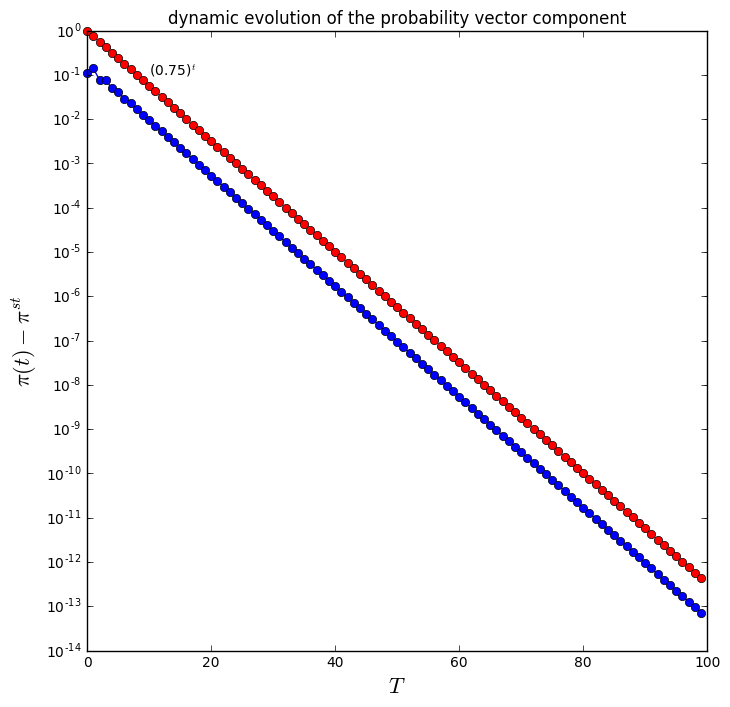

In [8]:
import pylab
%matplotlib inline

position = np.zeros(9)
position[0] = 1.0
list_T = []
list_av = []
list_fit= []
for t in range(100):
    list_T.append( t )
    list_av.append( abs(position[1]- 1.0 / 9.0) )
    list_fit.append( np.power(0.75,t) )
#    if not t%10: print( t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position = np.dot(transfer, position)
pylab.figure(figsize=(8,8))
pylab.semilogy(list_T, list_av, 'bo-', clip_on=False)
pylab.semilogy(list_T, list_fit, 'ro', clip_on=False)
pylab.annotate('(0.75)$^t$', xy=(10, 0.1), xytext=(10, 0.1))
pylab.title('dynamic evolution of the probability vector component' )
pylab.xlabel('$T$', fontsize=16)
pylab.ylabel('$\pi(t)-\pi^{st}$', fontsize=16)
pylab.show()